# Algoritmo PCA

El algoritmo PCA (Análisis de Componentes Principales) permite encontrar una representación de baja dimensionalidad $\mathbf{y_i}$ que explica la varianza de los datos originales $\mathbf{x_i}$. 

\begin{align*}
\mathbf{y_i}=U^T (\mathbf{x_i}-\mu)\\
\tilde{\mathbf{x_i}}=U \mathbf{y_i} +\mu
\end{align*}

In [317]:
using LinearAlgebra; 
using MultivariateStats;
using Statistics;

X=[ 7  4  3;
    4  1  8; 
    6  3  5;
    8  6  1;
    8  5  7;
    7  2  9;
    5  3  3;
    9  5  8;
    7  4  5;
    8  2  2];
μ=mean!([1. 1. 1.],X)
σ=sqrt.(sum(X_m.^2,dims=1))
X_m=(X.-μ)
M = fit(PCA, transpose(X_m),maxoutdim=2)
Yte = transform(M, transpose(X_m))
X_r=transpose(reconstruct(M, Yte)).+μ
E=norm(X-X_r)

2.5979517653630966

In [318]:
M

PCA(indim = 3, outdim = 2, principalratio = 0.9409505391500154)

Pattern matrix (unstandardized loadings):
──────────────────────
         PC1       PC2
──────────────────────
1  -0.395715  1.34028
2  -0.720434  1.26714
3   2.75651   0.523582
──────────────────────

Importance of components:
─────────────────────────────────────────────
                                PC1       PC2
─────────────────────────────────────────────
SS Loadings (Eigenvalues)  8.27394   3.67613
Variance explained         0.651492  0.289459
Cumulative variance        0.651492  0.940951
Proportion explained       0.692376  0.307624
Cumulative proportion      0.692376  1.0
─────────────────────────────────────────────

In [319]:
X_r

10×3 Matrix{Float64}:
 7.07496  3.92443   2.99101
 4.35819  0.638889  7.95704
 6.18905  2.8094    4.97733
 8.4573   5.53896   0.945154
 8.31521  4.68222   6.9622
 6.43642  2.56818   9.06759
 5.56336  2.43204   2.93243
 8.88185  5.11912   8.01417
 7.19307  3.80535   4.97684
 6.53059  3.48141   2.17623

In [343]:
values,vectors=eigen(cov(X_m));

In [357]:
size(X_m)

(10, 3)

In [345]:
U=[vectors[:,3] vectors[:,2]]
V=sort(values[2:3],rev=true)
U_s=sqrt.(V)'.*U

3×2 Matrix{Float64}:
 -0.395715  1.34028
 -0.720434  1.26714
  2.75651   0.523582

In [346]:
imp=V./sum(V)
print("Proportion explained : $imp")

Proportion explained : [0.6923759694669046, 0.3076240305330955]

In [349]:
Y_t=transpose(U)*transpose(X_m)
X_r2=transpose(U*Y_t).+μ

10×3 Matrix{Float64}:
 7.07496  3.92443   2.99101
 4.35819  0.638889  7.95704
 6.18905  2.8094    4.97733
 8.4573   5.53896   0.945154
 8.31521  4.68222   6.9622
 6.43642  2.56818   9.06759
 5.56336  2.43204   2.93243
 8.88185  5.11912   8.01417
 7.19307  3.80535   4.97684
 6.53059  3.48141   2.17623

In [382]:
transpose(U)

2×3 transpose(::Matrix{Float64}) with eltype Float64:
 -0.137571  -0.25046   0.958303
  0.699037   0.660889  0.27308

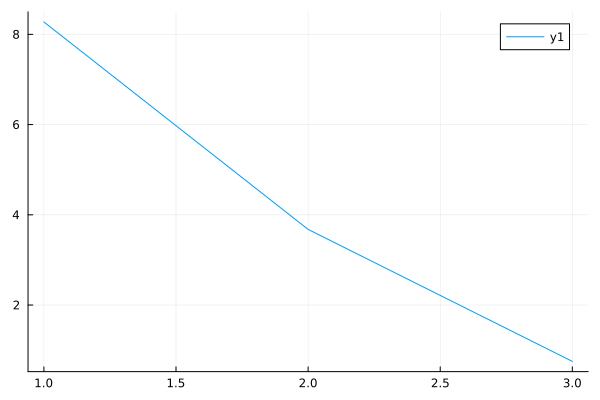

In [350]:
using Plots;

plot(sort(values,rev=true))

# EigenFaces

En el caso del reconocimiento facial, el algoritmo Eigenfaces utiliza esta representación de baja dimensionalidad para comparar caras nuevas (no utilizadas para ajustar los valores y vectores propios). Sin embargo, una de los problemas al utlizar esta técnica es determinar la dimensionalidad \emph{intrinsica} de los datos. Esto quiere decir que el número de componentes principales es desconocido y debe determinarse mediante un compromiso entre el error de reconstrucción $E=\sum_i^n (\mathbf{x_i}-\tilde{\mathbf{x_i}})^2$ y la capacidad de comprimir y explicar los datos.

https://bio322.epfl.ch/notebooks/pca.html

In [3]:
using Images,Colors
using ImageTransformations

path="eigenvalue_pics/"
dim=64

function images_to_mat(pathlist,dim,data_type)
    mat=zeros(data_type,length(pathlist),dim*dim)
    for (index,images) in enumerate(pathlist)
        img=load(images)
        img_g=Gray.(img)
        img_g=imresize(img_g,dim,dim)
        img_g=255*data_type.(img_g)
        img_g=reshape(img_g,(1,dim*dim))
        mat[index,:]=img_g
    end 
    return mat
end

pathlist=[]
for d in readdir(path)
    for f in readdir(path*d)
        file_path=path*d*"/"*f
        push!(pathlist,file_path)
    end 
end 

In [6]:
using LinearAlgebra; 
using MultivariateStats;
using Statistics;

mat=images_to_mat(pathlist,dim,Float64)
mean_face=mean!(transpose(ones(dim*dim)),mat)
centered_mat=mat.-mean_face;

In [7]:
values,vectors=eigen(cov(centered_mat));

In [8]:
sorted_values=sort(values,rev=true);

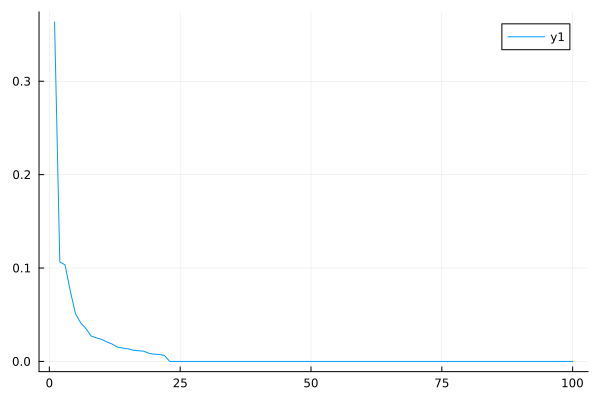

In [10]:
using Plots;

sorted_values=sorted_values./sum(sorted_values)
plot(sorted_values[1:100])

In [11]:
size(vectors)

(4096, 4096)

In [12]:
num_components=25

25

In [15]:
eigenfaces=vectors[:,4096:-1:(4096-num_components+1)];

In [17]:
size(eigenfaces)

(4096, 25)

In [18]:
P=transpose(eigenfaces)*transpose(centered_mat);

In [21]:
P

25×23 Matrix{Float64}:
 -1778.27         2486.09         …  -3683.3           -704.231
  1204.55          447.36             3020.44           539.949
 -1678.58          739.951            -434.328         -827.797
  -717.624          88.4084            458.142         2559.24
  -149.743         109.373           -1219.34          -152.485
   764.808        -192.488        …  -1087.38          -148.239
   813.711         248.588             808.306         -590.594
   461.526        -269.644            -789.061           12.8312
   992.136         -10.6895           -518.263        -1139.49
  -720.051        -162.884           -1125.48           289.348
     ⋮                            ⋱                   
   638.224         227.091            -243.428          497.24
   -70.362        -421.787             394.454         -506.577
   -34.0007        333.046             -50.7842        -463.289
   555.01          177.704              65.2872        -108.58
  -126.641        -670.563   

In [19]:
R=transpose(eigenfaces*P).+mean_face

23×4096 Matrix{Float64}:
 205.0  206.0  207.0  208.0  210.0  …   16.0   19.0   17.0   28.0   29.0
  35.0   36.0   39.0   43.0   50.0      20.0   19.0   18.0   20.0   14.0
 153.0  147.0  133.0  126.0  121.0     187.0  174.0  151.0  127.0   99.0
  75.0   79.0   83.0   88.0   91.0      15.0   21.0   20.0   14.0    5.0
  12.0   13.0   16.0   16.0   15.0      20.0    9.0   12.0    9.0   11.0
  70.0   74.0   75.0   75.0   74.0  …   36.0   36.0   34.0   39.0   22.0
 102.0  100.0   98.0   96.0   97.0     136.0  137.0  135.0  134.0  136.0
  75.0   75.0   76.0   76.0   76.0      80.0   86.0  105.0  111.0  117.0
  95.0   97.0   98.0   98.0  100.0     104.0  104.0  104.0  100.0   23.0
 201.0  202.0  202.0  202.0  203.0     203.0  203.0  205.0  209.0    6.0
   ⋮                                ⋱                                ⋮
 164.0  168.0  169.0  172.0  175.0     209.0  207.0  206.0  205.0  204.0
 138.0  139.0  139.0  141.0  141.0  …  220.0  220.0  220.0  221.0  221.0
 253.0  253.0  253.0  253.0 

In [20]:
norm(mat-R)

4.888437818966843e-11

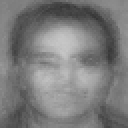

In [47]:
Gray.((reshape(mean_face,(dim,dim)))./255)